# Compare Fixed Incremental Vs. Dynamic Incremental

In [1]:
from collections import defaultdict
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

In [2]:
data = [{'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '4096', 'eval_len': '32768', 'github_ppl': 1.889067, 'arxiv_ppl': 4.056448}, {'pruner': 'SnapKV', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '1024', 'eval_len': '32768', 'github_ppl': 1.533641, 'arxiv_ppl': 2.763743}, {'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '512', 'eval_len': '32768', 'github_ppl': 1.582619, 'arxiv_ppl': 3.021886}, {'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '2048', 'eval_len': '32768', 'github_ppl': 1.746545, 'arxiv_ppl': 3.310038}, {'pruner': 'SnapKV', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '256', 'eval_len': '32768', 'github_ppl': 1.606433, 'arxiv_ppl': 3.004926}, {'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '1024', 'eval_len': '32768', 'github_ppl': 1.541791, 'arxiv_ppl': 2.854685}, {'pruner': 'SnapKV', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '512', 'eval_len': '32768', 'github_ppl': 1.565982, 'arxiv_ppl': 2.878241}, {'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '256', 'eval_len': '32768', 'github_ppl': 1.632743, 'arxiv_ppl': 3.191903}, {'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '8192', 'eval_len': '32768', 'github_ppl': 3.911651, 'arxiv_ppl': 7.448895}, {'pruner': 'StreamingLLM', 'memory': 'Fixed Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '4096', 'eval_len': '32768', 'github_ppl': 1.974102, 'arxiv_ppl': 4.507864}, {'pruner': 'StreamingLLM', 'memory': 'Fixed Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '2048', 'eval_len': '32768', 'github_ppl': 1.754107, 'arxiv_ppl': 3.469853}, {'pruner': 'SnapKV', 'memory': 'Fixed Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '256', 'eval_len': '32768', 'github_ppl': 1.78742, 'arxiv_ppl': 3.571339}, {'pruner': 'StreamingLLM', 'memory': 'Fixed Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '8192', 'eval_len': '32768', 'github_ppl': 3.186903, 'arxiv_ppl': 8.947858}, {'pruner': 'SnapKV', 'memory': 'Fixed Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '512', 'eval_len': '32768', 'github_ppl': 1.749134, 'arxiv_ppl': 3.419521}, {'pruner': 'SnapKV', 'memory': 'Fixed Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '1024', 'eval_len': '32768', 'github_ppl': 1.707531, 'arxiv_ppl': 3.282581}]

In [3]:
macaron_colors = [
    '#FA7F6F',  # Light Blue
    '#8ECFC9',  # Light Yellow
    '#82B0D2',  # Light Green
]

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ppl(fixed_arxiv_ppl, incremental_arxiv_ppl, full_attn_arxiv_ppl, memory_sizes, ylabel, figurename):
    plt.figure(figsize=(10, 6))
    min_value = min(fixed_arxiv_ppl + incremental_arxiv_ppl)
    max_value = max(fixed_arxiv_ppl + incremental_arxiv_ppl)
    
    if full_attn_arxiv_ppl is not None:
        plt.axhline(y=full_attn_arxiv_ppl, color='black', linestyle='--', linewidth=1, label='Full-Attention PPL')

    x = np.arange(len(memory_sizes))
    width = 0.3
    bars1 = plt.bar(x - width, fixed_arxiv_ppl, width, label='Fixed Incremental Memory', color=macaron_colors[0])
    bars2 = plt.bar(x, incremental_arxiv_ppl, width, label='Dynamic Incremental Memory', color=macaron_colors[1])
    
    plt.xlabel('Memory size')
    plt.ylabel(ylabel)
    plt.xticks(x, memory_sizes)
    plt.ylim(min_value - 0.1, max_value + 0.1)
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Add numerical labels on the bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:.3f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=14)
    
    add_labels(bars1)
    add_labels(bars2)
    
    plt.savefig(figurename)
    plt.close()

def visualize_ppl(ppl_data, pruner, full_attn_arxiv_ppl=None, full_attn_github_ppl=None):
    plt.figure(figsize=(10, 6))
    ppl_data = sorted(ppl_data, key=lambda x: int(x['memorysize']))
    memory_sizes = sorted(list(set([int(d['memorysize']) for d in ppl_data])))

    fixed_arxiv_ppl = [d['arxiv_ppl'] for d in ppl_data if d['memory'] == 'Fixed Incremental Memory' and d['arxiv_ppl'] is not None]
    incremental_arxiv_ppl = [d['arxiv_ppl'] for d in ppl_data if d['memory'] == 'Dynamic Incremental Memory' and d['arxiv_ppl'] is not None]

    print(fixed_arxiv_ppl)
    print(incremental_arxiv_ppl)

    plot_ppl(fixed_arxiv_ppl, incremental_arxiv_ppl, full_attn_arxiv_ppl, memory_sizes, 'Arixv PPL', figurename=f'./imgs/fix_vs_dynamic_{pruner}_arxiv_ppl')

    fixed_github_ppl = [d['github_ppl'] for d in ppl_data if d['memory'] == 'Fixed Incremental Memory' and d['github_ppl'] is not None]
    incremental_github_ppl = [d['github_ppl'] for d in ppl_data if d['memory'] == 'Dynamic Incremental Memory' and d['github_ppl'] is not None]

    print(incremental_github_ppl)
    print(fixed_github_ppl)
    
    plot_ppl(fixed_github_ppl, incremental_github_ppl, full_attn_arxiv_ppl, memory_sizes, 'Github PPL', f'./imgs/fix_vs_dynamic_{pruner}_github_ppl')


In [5]:
snapkv_chunk_1024_ppl = []
for r in data:
    if r['memory'] in ['Dynamic Incremental Memory', 'Fixed Incremental Memory'] and r['pruner']=='SnapKV' and r['chunk'] == '1024':
        snapkv_chunk_1024_ppl.append(r)
for d in snapkv_chunk_1024_ppl:
    print(d)

{'pruner': 'SnapKV', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '1024', 'eval_len': '32768', 'github_ppl': 1.533641, 'arxiv_ppl': 2.763743}
{'pruner': 'SnapKV', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '256', 'eval_len': '32768', 'github_ppl': 1.606433, 'arxiv_ppl': 3.004926}
{'pruner': 'SnapKV', 'memory': 'Dynamic Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '512', 'eval_len': '32768', 'github_ppl': 1.565982, 'arxiv_ppl': 2.878241}
{'pruner': 'SnapKV', 'memory': 'Fixed Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '256', 'eval_len': '32768', 'github_ppl': 1.78742, 'arxiv_ppl': 3.571339}
{'pruner': 'SnapKV', 'memory': 'Fixed Incremental Memory', 'chunk': '1024', 'compressed_chunk': None, 'memorysize': '512', 'eval_len': '32768', 'github_ppl': 1.749134, 'arxiv_ppl': 3.419521}
{'pruner': 'SnapKV', 'memory': 'Fixed I

In [6]:
streaming_chunk_8192_ppl = []
for r in data:
    if r['memory'] in ['Dynamic Incremental Memory', 'Fixed Incremental Memory'] and r['pruner']=='StreamingLLM' and r['chunk'] == '8192':
        streaming_chunk_8192_ppl.append(r)
for d in streaming_chunk_8192_ppl:
    print(d)

{'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '4096', 'eval_len': '32768', 'github_ppl': 1.889067, 'arxiv_ppl': 4.056448}
{'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '2048', 'eval_len': '32768', 'github_ppl': 1.746545, 'arxiv_ppl': 3.310038}
{'pruner': 'StreamingLLM', 'memory': 'Dynamic Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '8192', 'eval_len': '32768', 'github_ppl': 3.911651, 'arxiv_ppl': 7.448895}
{'pruner': 'StreamingLLM', 'memory': 'Fixed Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '4096', 'eval_len': '32768', 'github_ppl': 1.974102, 'arxiv_ppl': 4.507864}
{'pruner': 'StreamingLLM', 'memory': 'Fixed Incremental Memory', 'chunk': '8192', 'compressed_chunk': None, 'memorysize': '2048', 'eval_len': '32768', 'github_ppl': 1.754107, 'arxiv_ppl': 3.469853}
{'pr

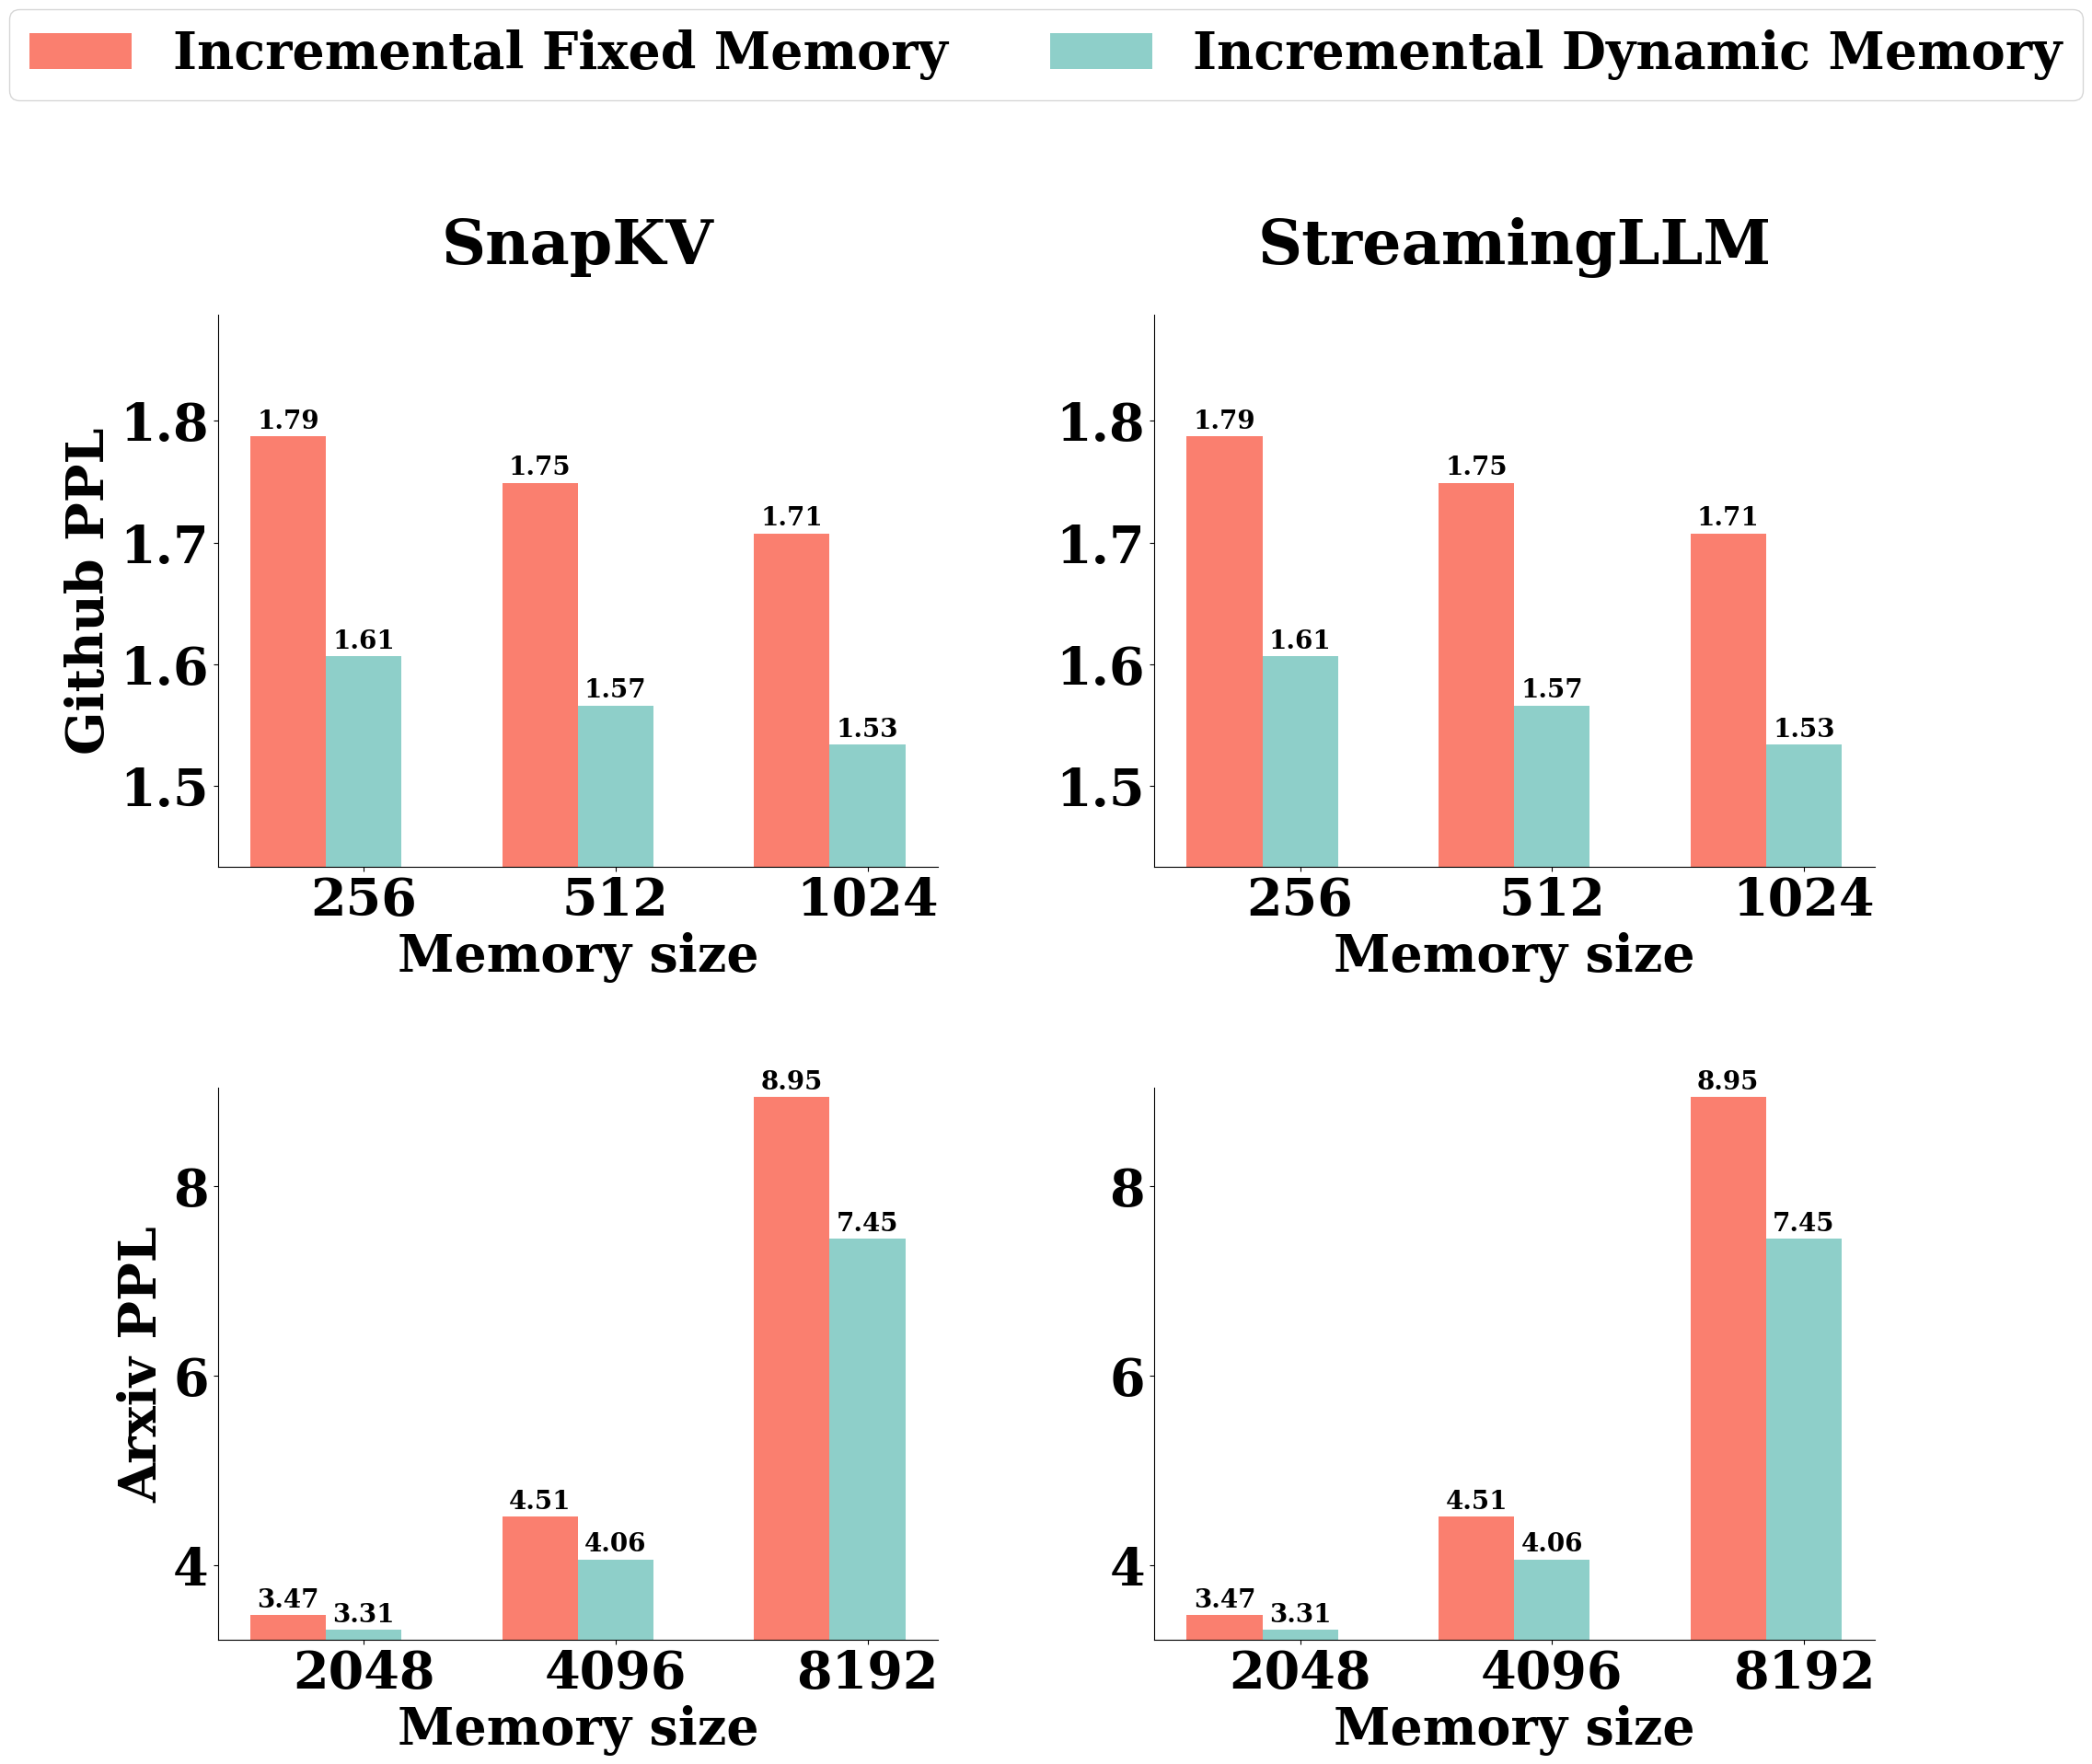

In [15]:
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 40})
def visualize_ax(ax, fix, incremental, memory_sizes, title, ylabel, full_attn_ppl):
    min_value = min(fix + incremental )
    max_value = max(fix + incremental )
    x = np.arange(len(memory_sizes))
    width = 0.3
    bar1 = ax.bar(x - width, fix, width, label='Fixed Incremental Memory', color=macaron_colors[0])
    bar2 = ax.bar(x, incremental, width, label='Dynamic Incremental Memory', color=macaron_colors[1])
    if full_attn_ppl is not None:
        ax.axhline(y=full_attn_ppl, linestyle='--', color='black', label='Full Attention')
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 2),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=20)
                        
    add_labels(bar1)
    add_labels(bar2)
    
    ax.set_xlabel('Memory size')
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.set_xticks(x, memory_sizes)
    ax.set_ylim(min_value - 0.1, max_value + 0.1)
    ax.set_title(title, pad=40)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

data_dict_list = [snapkv_chunk_1024_ppl, streaming_chunk_8192_ppl]
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
for row in range(2):
    for col in range(2):
        ppl_data = data_dict_list[row]
        if row == 0:
            domain = 'github'
            y_label = 'Github PPL'
        else:
            domain = 'arxiv'
            y_label = 'Arxiv PPL'
        if row == 0:
            if col == 0:
                title = "SnapKV"
            else:
                title = "StreamingLLM"
        else:
            title = None

        # if row == 1:
        # if col == 0:
        #     full_attn_ppl=7.56
        # else:
        #     full_attn_ppl=11.095464
        # else:
        full_attn_ppl = None
        ppl_data = sorted(ppl_data, key=lambda x: int(x['memorysize']))
        memory_sizes = sorted(list(set([int(d['memorysize']) for d in ppl_data])))

        fixed_ppl = [d[f'{domain}_ppl'] for d in ppl_data if d['memory'] == 'Fixed Incremental Memory' and d[f'{domain}_ppl'] is not None]
        incremental_ppl = [d[f'{domain}_ppl'] for d in ppl_data if d['memory'] == 'Dynamic Incremental Memory' and d[f'{domain}_ppl'] is not None]

        # row = 0
        if col:
            y_label = None
        visualize_ax(ax[row, col], fixed_ppl, incremental_ppl, memory_sizes=memory_sizes, title=title, ylabel=y_label, full_attn_ppl=full_attn_ppl)

# legend_elements = [mpatches.Patch(color=macaron_colors[0], label='Fixed-size Memory'),
#                    mpatches.Patch(color=macaron_colors[1], label='Incremental Memory'),
#                    mpatches.Patch(color='cornflowerblue', label='Decremental Chunk')]

fig.legend(['Incremental Fixed Memory', 'Incremental Dynamic Memory'], 
        loc='upper center',   # 将图例置于上方中心
        ncol=2,             # 设定图例中项目的列数
        bbox_to_anchor=(0.5, 1.05))  # 使用bbox_to_anchor调整图例的具体位置
plt.tight_layout()
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.85, wspace=0.3, hspace=0.4)
plt.savefig(f'/remote-home/zyzeng/collie/imgs/fix_vs_dynamic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# visualize_ppl(snapkv_chunk_1024_ppl, pruner='SnapKV')

[3.571339, 3.419521, 3.282581]
[3.004926, 2.878241, 2.763743]
[1.606433, 1.565982, 1.533641]
[1.78742, 1.749134, 1.707531]


<Figure size 1000x600 with 0 Axes>

In [ ]:
# visualize_ppl(streaming_chunk_8192_ppl, pruner='StreamingLLM')

[3.469853, 4.507864, 8.947858]
[3.310038, 4.056448, 7.448895]
[1.746545, 1.889067, 3.911651]
[1.754107, 1.974102, 3.186903]


<Figure size 1000x600 with 0 Axes>